In [353]:
# libraries
import pandas as pd
import numpy as np
import requests
import json
from pandas.io.json import json_normalize

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz 
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn import metrics
from math import *
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import pickle

In [312]:
data = pd.read_csv('wind_generation_data.csv', sep = ',')#, parse_dates=['date'])

In [313]:
data.shape

(366, 3)

In [314]:
data ['days'] = data.index

In [315]:
data.head(10)

,wind speed,direction,Power Output,days
0,16.00,218,34.76,0
1,15.91,218,36.59,1
2,15.82,218,32.35,2
3,15.73,218,39.37,3
4,15.64,218,33.22,4
5,15.55,218,37.09,5
6,15.46,218,41.23,6
7,15.37,218,32.72,7
8,15.28,218,40.39,8
9,15.19,218,37.54,9


In [316]:
#count = 0
def plus(numb):
    count = numb + 1
    return count

In [317]:
data.dtypes

wind speed      float64
direction         int64
Power Output    float64
days              int64
dtype: object

In [318]:
data['dayg'] = plus(data['days'])

In [319]:
def month(x):
    y = 31
    p, q = divmod(x, y)
    return (p)

In [320]:
data['months'] = month(data['days'])

In [321]:
data['month'] = plus(data['months'])

In [322]:
data.head(40)

,wind speed,direction,Power Output,days,dayg,months,month
0,16.00,218,34.76,0,1,0,1
1,15.91,218,36.59,1,2,0,1
2,15.82,218,32.35,2,3,0,1
3,15.73,218,39.37,3,4,0,1
4,15.64,218,33.22,4,5,0,1
5,15.55,218,37.09,5,6,0,1
6,15.46,218,41.23,6,7,0,1
7,15.37,218,32.72,7,8,0,1
8,15.28,218,40.39,8,9,0,1
9,15.19,218,37.54,9,10,0,1


In [323]:
def dayum(x):
    #while x != 0:
    y = 31
    p, q = divmod(x, y)
    #print (q)
    g = q ++ 1
    return (g)

In [324]:
data['day'] = dayum(data['days'])

In [325]:
data.head(40)

,wind speed,direction,Power Output,days,dayg,months,month,day
0,16.00,218,34.76,0,1,0,1,1
1,15.91,218,36.59,1,2,0,1,2
2,15.82,218,32.35,2,3,0,1,3
3,15.73,218,39.37,3,4,0,1,4
4,15.64,218,33.22,4,5,0,1,5
5,15.55,218,37.09,5,6,0,1,6
6,15.46,218,41.23,6,7,0,1,7
7,15.37,218,32.72,7,8,0,1,8
8,15.28,218,40.39,8,9,0,1,9
9,15.19,218,37.54,9,10,0,1,10


In [326]:
data = data.drop(['months', 'days', 'dayg'], axis = 1)

In [327]:
data.head(40)

,wind speed,direction,Power Output,month,day
0,16.00,218,34.76,1,1
1,15.91,218,36.59,1,2
2,15.82,218,32.35,1,3
3,15.73,218,39.37,1,4
4,15.64,218,33.22,1,5
5,15.55,218,37.09,1,6
6,15.46,218,41.23,1,7
7,15.37,218,32.72,1,8
8,15.28,218,40.39,1,9
9,15.19,218,37.54,1,10


In [328]:
data.isna().sum()

wind speed      0
direction       0
Power Output    0
month           0
day             0
dtype: int64

In [329]:
data.dtypes

wind speed      float64
direction         int64
Power Output    float64
month             int64
day               int64
dtype: object

In [330]:
data.columns

Index(['wind speed', 'direction', 'Power Output', 'month', 'day'], dtype='object')

In [331]:
corr = data.corr()

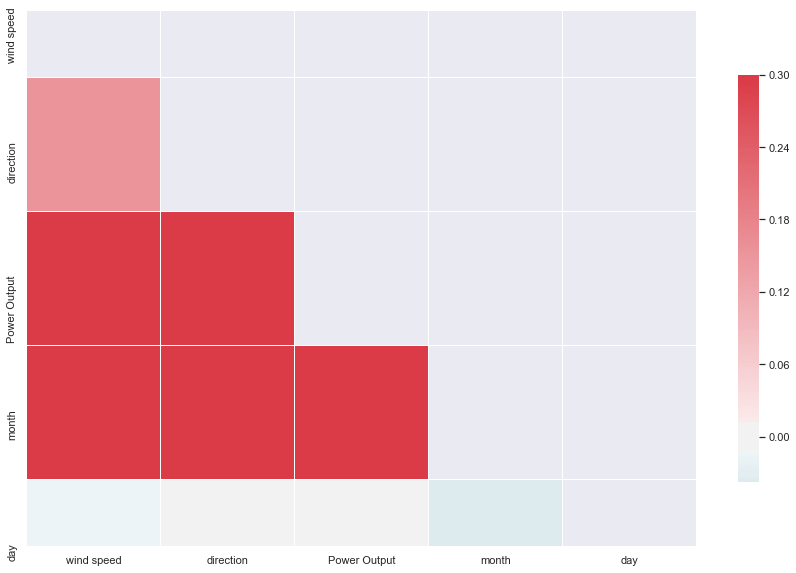

In [333]:
sns.set()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [334]:
data.describe()

,wind speed,direction,Power Output,month,day
count,366.000000,366.000000,366.000000,366.000000,366.000000
mean,15.695792,220.081967,37.193607,6.409836,15.795082
std,3.743556,4.462796,7.243363,3.411714,8.881199
min,7.450000,209.000000,23.170000,1.000000,1.000000
25%,13.000000,218.000000,31.352500,3.000000,8.000000
50%,15.530000,220.000000,37.525000,6.000000,16.000000
75%,18.802500,222.000000,42.925000,9.000000,23.000000
max,22.710000,234.000000,51.810000,12.000000,31.000000


In [335]:
y= data['Power Output'].values
Xdata = data.drop(['Power Output'], axis = 1)
X = Xdata.values
#X = StandardScaler().fit_transform(X)
model = RandomForestRegressor(n_jobs=-1)

In [336]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

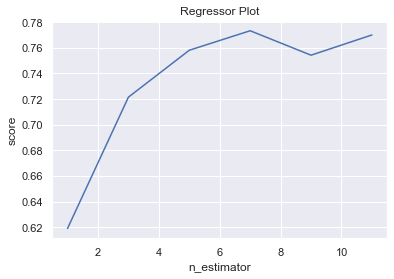

In [337]:
estimators = np.arange(1, 12, 2)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Regressor Plot")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [338]:
labels = Xdata.columns
result = pd.DataFrame()
result['feature'] = labels
result['importance'] = model.feature_importances_
result.sort_values(by=['importance'], ascending=False, inplace=True)
result

,feature,importance
2,month,0.725366
0,wind speed,0.174079
3,day,0.074879
1,direction,0.025677


In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Training data', len(X_train), len(y_train))
print('Test data', len(X_test), len(y_test))

Training data 256 256
Test data 110 110


In [348]:
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [349]:
Y_predicted = dt.predict(X_test)
dt.score(X_test, y_test)

0.7687310732831371

In [113]:
#filename = 'Wind_model.sav'
#pickle.dump(dt, open(filename, 'wb'))

In [351]:
pickle.dump(dt, open('wind_model.pkl','wb'))


API Code

In [354]:
# Wind
longitude = 53.556563
latitude = 8.598084

url = ('https://api.openweathermap.org/data/2.5/onecall?lat=8.598084&lon=53.556563&units=imperial&appid=43e49f2fb4d17b806dfff389f21f4d27')
response = requests.get(url)

print(response.status_code)

200


In [355]:
weather = response.json()
dailynorm = json_normalize(weather, 'daily')
df = pd.DataFrame(dailynorm)

In [356]:
wind_df = df[['dt', 'wind_speed', 'wind_deg']].copy()
wind_df.head(10)

,dt,wind_speed,wind_deg
0,1601712000,8.39,217
1,1601798400,10.36,173
2,1601884800,9.04,235
3,1601971200,8.95,225
4,1602057600,12.41,233
5,1602144000,11.56,229
6,1602230400,11.10,202
7,1602316800,10.96,208


In [359]:
wind_df['date'] = pd.to_datetime(wind_df['dt'],unit='s')
wind_df['day'] = wind_df['date'].dt.day
wind_df['month'] = wind_df['date'].dt.month
wind_df.head(10)

,dt,wind_speed,wind_deg,date,day,month
0,1601712000,8.39,217,2020-10-03 08:00:00,3,10
1,1601798400,10.36,173,2020-10-04 08:00:00,4,10
2,1601884800,9.04,235,2020-10-05 08:00:00,5,10
3,1601971200,8.95,225,2020-10-06 08:00:00,6,10
4,1602057600,12.41,233,2020-10-07 08:00:00,7,10
5,1602144000,11.56,229,2020-10-08 08:00:00,8,10
6,1602230400,11.10,202,2020-10-09 08:00:00,9,10
7,1602316800,10.96,208,2020-10-10 08:00:00,10,10


In [361]:
wind_df.rename(columns={'wind_speed':'wind speed', 'wind_deg':'direction'}, inplace=True)
wind_df = wind_df.drop(['dt','date'], axis = 1)


In [362]:
wind_df = wind_df.fillna(0)

In [363]:
model = pickle.load(open('wind_model.pkl','rb'))

In [364]:
Xnew = wind_df.values

In [365]:
p_pred = model.predict(Xnew)

In [366]:
p_pred

array([28.53192308, 28.53192308, 28.53192308, 35.776     , 37.04111111,
       39.85366667, 43.86866667, 43.86866667])

In [367]:
p_pred = pd.DataFrame(p_pred)

In [368]:
p_pred.columns = ['Predicted Power']

In [369]:
final_wind_df = pd.concat([wind_df, p_pred], axis = 1)

In [371]:
print(final_wind_df)

   wind speed  direction  day  month  Predicted Power
0        8.39        217    3     10        28.531923
1       10.36        173    4     10        28.531923
2        9.04        235    5     10        28.531923
3        8.95        225    6     10        35.776000
4       12.41        233    7     10        37.041111
5       11.56        229    8     10        39.853667
6       11.10        202    9     10        43.868667
7       10.96        208   10     10        43.868667
